# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


## Three observable trends based on the data include the following:

As expected, temperature increases the closer to the equator. 

Per the Latitude vs. Max Temperature Plot, the maximum temperature stays consistent and at a maximum from -25 degrees to 25 degrees latitude.


The Latitude vs. Wind Speed Plot shows that there is slight increase of wind speed when moving away from the equator. It is extremely subtle.Per the plots below, Humidity and Cloudiness do not demonstrate a strong correlation to latitude.





In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from dotenv import load_dotenv
import gmaps
import seaborn as sns

# Import API key
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
open_weather_api_key = os.getenv("open_weather_api_key")
google_api_key = os.getenv("google_api_key")

# Access maps with unique API key
gmaps.configure(api_key=google_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# initialize lists to hold data from api call
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={open_weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : busselton
Processing Record 2 of Set 1 : cape town
Processing Record 3 of Set 1 : nikolskoye
Processing Record 4 of Set 1 : chuy
Processing Record 5 of Set 1 : hilo
Processing Record 6 of Set 1 : bethel
Processing Record 7 of Set 1 : saint george
Processing Record 8 of Set 1 : esperance
Processing Record 9 of Set 1 : punta arenas
Processing Record 10 of Set 1 : ostrovnoy
City not found. Skipping...
Processing Record 11 of Set 1 : dikson
City not found. Skipping...
Processing Record 12 of Set 1 : beidao
City not found. Skipping...
Processing Record 13 of Set 1 : vaini
Processing Record 14 of Set 1 : jacksonville
Processing Record 15 of Set 1 : yellowknife
City not found. Skipping...
Processing Record 16 of Set 1 : xuddur
Processing Record 17 of Set 1 : cidreira
Processing Record 18 of Set 1 : puerto ayora
Processing Record 19 of Set 1 : mar del plata
Processing Record 20 of Set 1 : hermanus
Processing

Processing Record 35 of Set 4 : okato
Processing Record 36 of Set 4 : lasa
Processing Record 37 of Set 4 : sinnamary
Processing Record 38 of Set 4 : alekseyevsk
Processing Record 39 of Set 4 : det udom
Processing Record 40 of Set 4 : onega
Processing Record 41 of Set 4 : hami
Processing Record 42 of Set 4 : mobaye
Processing Record 43 of Set 4 : morondava
Processing Record 44 of Set 4 : tanout
Processing Record 45 of Set 4 : sept-iles
Processing Record 46 of Set 4 : khandbari
Processing Record 47 of Set 4 : ust-kuyga
Processing Record 48 of Set 4 : manggar
Processing Record 49 of Set 4 : caravelas
Processing Record 50 of Set 4 : lorengau
Processing Record 0 of Set 5 : ponta do sol
Processing Record 1 of Set 5 : new norfolk
Processing Record 2 of Set 5 : koygorodok
Processing Record 3 of Set 5 : marsh harbour
Processing Record 4 of Set 5 : thionville
City not found. Skipping...
Processing Record 5 of Set 5 : broome
Processing Record 6 of Set 5 : lingao
Processing Record 7 of Set 5 : ito

Processing Record 20 of Set 8 : ambilobe
City not found. Skipping...
Processing Record 21 of Set 8 : labrea
Processing Record 22 of Set 8 : sacele
Processing Record 23 of Set 8 : tignere
Processing Record 24 of Set 8 : herat
Processing Record 25 of Set 8 : falam
Processing Record 26 of Set 8 : killarney
Processing Record 27 of Set 8 : french harbor
City not found. Skipping...
Processing Record 28 of Set 8 : tevaitoa
Processing Record 29 of Set 8 : najran
Processing Record 30 of Set 8 : kushiro
Processing Record 31 of Set 8 : berberati
Processing Record 32 of Set 8 : tezu
Processing Record 33 of Set 8 : matucana
Processing Record 34 of Set 8 : escuintla
Processing Record 35 of Set 8 : mustasaari
Processing Record 36 of Set 8 : prince rupert
Processing Record 37 of Set 8 : patos
Processing Record 38 of Set 8 : quelimane
City not found. Skipping...
Processing Record 39 of Set 8 : port augusta
Processing Record 40 of Set 8 : smoky lake
Processing Record 41 of Set 8 : acari
Processing Recor

In [4]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)
weather_dict.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,62,AU,1630120123,63,-33.6500,115.3333,61.05,9.55
1,Cape Town,72,ZA,1630119942,93,-33.9258,18.4232,44.89,4.00
2,Nikolskoye,61,RU,1630120123,93,59.7035,30.7861,57.09,5.55
3,Chui,1,UY,1630120124,81,-33.6971,-53.4616,47.55,5.55
4,Hilo,90,US,1630120124,75,19.7297,-155.0900,82.27,5.75


In [6]:
# convert dictionary to dataframe and use .query to find cities with humidity > 99% 
weather_df = pd.DataFrame(weather_dict)
#weather_df.head()
humidity_df = weather_df.query('Humidity > 100')
humidity_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

#### I found there are no cities with humidity > 100% 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

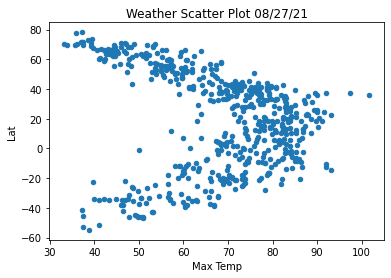

In [7]:
#Latitude vs Temperature

da= (time.strftime('Weather Scatter Plot %m/%d/%y'))        
weather_df.plot(kind='scatter',x='Max Temp', y='Lat',title=da )
pass


## Latitude vs. Humidity Plot

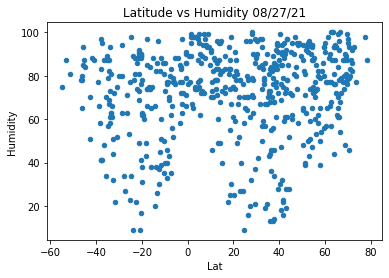

In [8]:
da=time.strftime('Latitude vs Humidity %m/%d/%y')
weather_df.columns
weather_df.plot(kind='scatter',x='Lat',y='Humidity',title=da)
pass

## Latitude vs. Cloudiness Plot

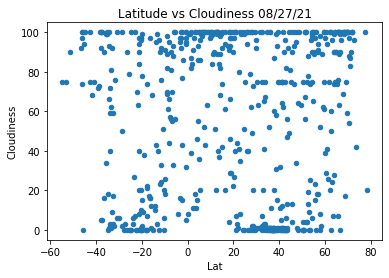

In [9]:
da=time.strftime('Latitude vs Cloudiness %m/%d/%y')
weather_df.plot(kind='scatter',x='Lat',y='Cloudiness',title = da)
pass

## Latitude vs. Wind Speed Plot

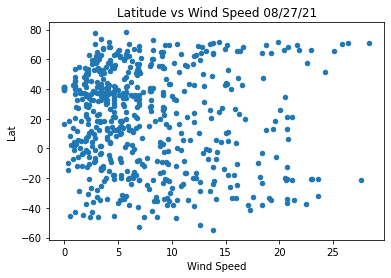

In [10]:
da=time.strftime('Latitude vs Wind Speed %m/%d/%y')
weather_df.plot(kind='scatter',x='Wind Speed',y='Lat',title=da)
pass

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_df = weather_dict.loc[weather_dict["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

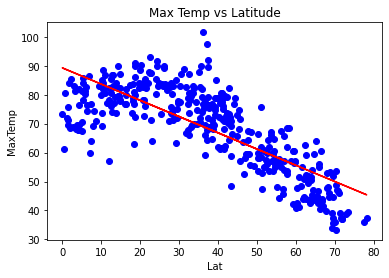

In [12]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')
#label='Max Temp vs Latitude',

plt.xlabel('Lat')
plt.ylabel('MaxTemp')
plt.title('Max Temp vs Latitude')
plt.show()
pass

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

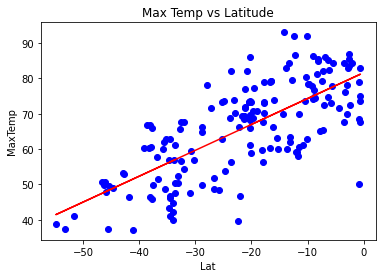

In [13]:
southern_df
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')
#label='Max Temp vs Latitude',

plt.xlabel('Lat')
plt.ylabel('MaxTemp')
plt.title('Max Temp vs Latitude')
plt.show()
pass

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

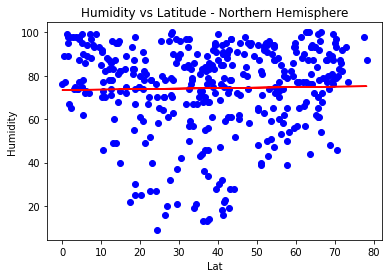

In [14]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude - Northern Hemisphere')
plt.show()
pass

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

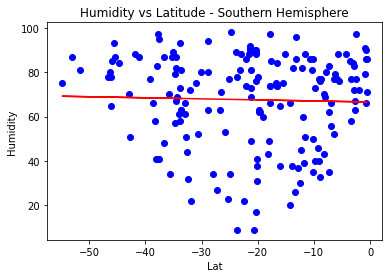

In [15]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude - Southern Hemisphere')
plt.show()
pass

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

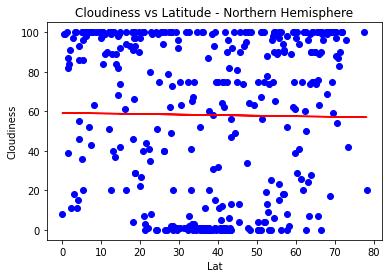

In [16]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude - Northern Hemisphere')
plt.show()
pass

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

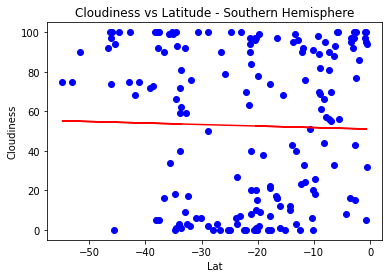

In [17]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude - Southern Hemisphere')
plt.show()
pass

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

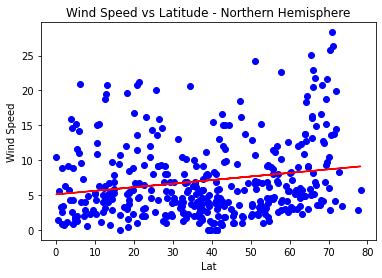

In [18]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude - Northern Hemisphere')
plt.show()
pass

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

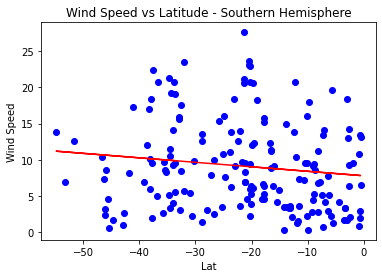

In [19]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude - Southern Hemisphere')
plt.show()
pass